#📌 Extracción

In [58]:
import pandas as pd
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

df = pd.read_json(url)

print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

#🔧 Transformación

In [59]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Unir todo en un solo DataFrame
df_normalized = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

print(df_normalized.head())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [60]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [61]:
# 1️⃣ Valores ausentes
print("Valores nulos por columna:")
print(df_normalized.isnull().sum())

Valores nulos por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [62]:
# 2️⃣ Filas duplicadas
print("\nCantidad de filas duplicadas:", df_normalized.duplicated().sum())


Cantidad de filas duplicadas: 0


In [63]:
# 3️⃣ Tipos de datos
print("\nTipos de datos:")
print(df_normalized.dtypes)


Tipos de datos:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


In [64]:
# 4️⃣ Inconsistencias en categorías (valores únicos)
print("\nValores únicos por columna categórica:")
for col in df_normalized.select_dtypes(include='object'):
    print(f"{col}: {df_normalized[col].unique()}")


Valores únicos por columna categórica:
customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


###1️⃣ Columna Churn → valor vacío ''

In [65]:
import numpy as np
df_normalized['Churn'] = df_normalized['Churn'].replace('', np.nan)

###2️⃣ Columna Charges.Total → números como texto

In [66]:
df_normalized['Charges.Total'] = pd.to_numeric(df_normalized['Charges.Total'], errors='coerce')


###3️⃣ Categorías tipo "No internet service" o "No phone service"

In [67]:
cols_to_clean = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_to_clean:
    df_normalized[col] = df_normalized[col].replace({'No internet service': 'No',
                                                     'No phone service': 'No'})


##Agregamos una nueva columna

In [68]:
# Si 'Charges.Total' ya está en formato numérico como vimos antes:
df_normalized['Cuentas_Diarias'] = df_normalized['Charges.Monthly'] / 30

# Verificamos
print(df_normalized[['Charges.Monthly', 'Cuentas_Diarias']].head())


   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


###1️⃣ Convertir valores "Yes"/"No" a binario

In [69]:
yes_no_cols = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for col in yes_no_cols:
    df_normalized[col] = df_normalized[col].map({'Yes': 1, 'No': 0})


###2️⃣ Convertir variables categóricas a valores numéricos

In [70]:
df_normalized = pd.get_dummies(df_normalized, columns=['Contract', 'PaymentMethod', 'InternetService'], drop_first=True)


###3️⃣ Renombrar columnas para mayor claridad

In [78]:
df_normalized.rename(columns={
    'Charges.Total': 'total_gastado',      # Total acumulado por el cliente
    'charges_monthly': 'facturacion_mensual',  # Pago mensual
    'Cuentas_Diarias': 'facturacion_diaria',
    'gender': 'genero'
}, inplace=True)


###4️⃣ Ajustar el formato de los nombres de columnas

In [79]:
df_normalized.columns = df_normalized.columns.str.lower()


In [80]:
# Reemplazamos puntos por guiones bajos en todos los nombres
df_normalized.columns = df_normalized.columns.str.replace('.', '_', regex=False)


#📊 Carga y análisis


##Análisis Descriptivo

In [43]:
df_normalized.describe()

,churn,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,facturacion_mensual,facturacion_mensual,facturacion_diaria
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2280.634213,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


##Distribución de evasión

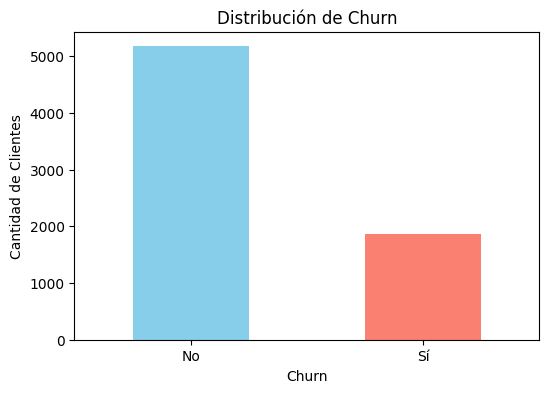

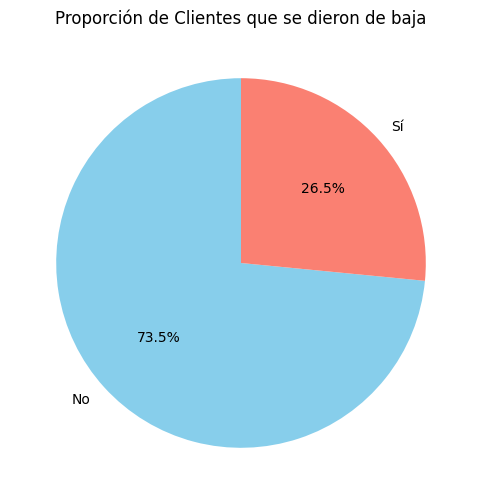

In [74]:
import matplotlib.pyplot as plt

# Mapear temporalmente para el gráfico
labels = {0: 'No', 1: 'Sí'}
churn_counts = df_normalized['churn'].map(labels).value_counts()

# --- Gráfico de barras ---
plt.figure(figsize=(6,4))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.show()

# --- Gráfico de torta ---
plt.figure(figsize=(6,6))
churn_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Proporción de Clientes que se dieron de baja')
plt.ylabel('')
plt.show()



##Recuento de evasión por variables categóricas

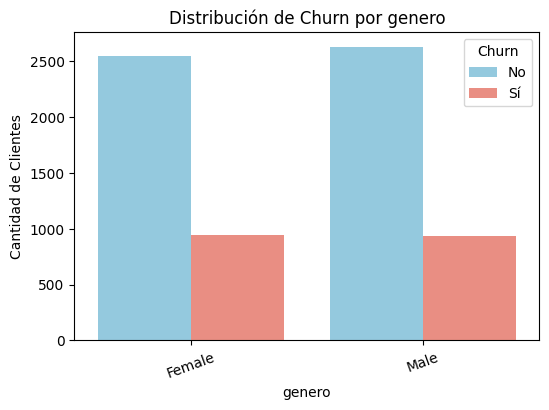

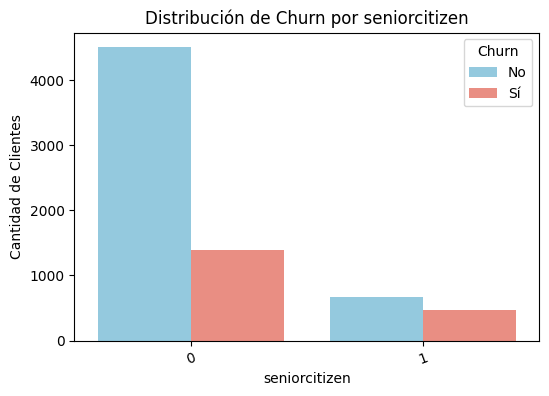

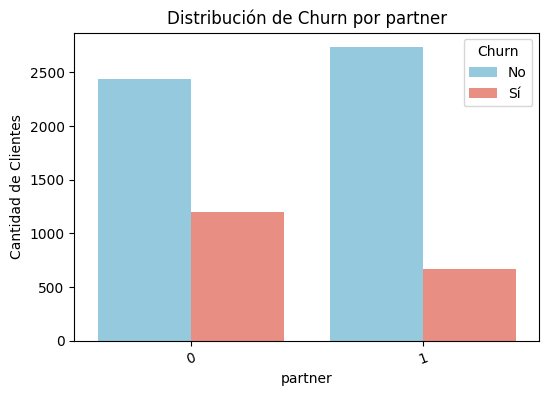

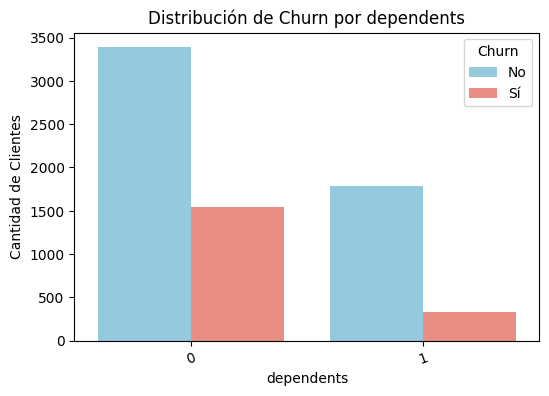

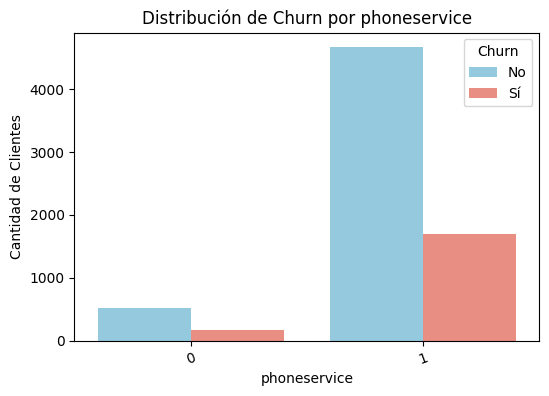

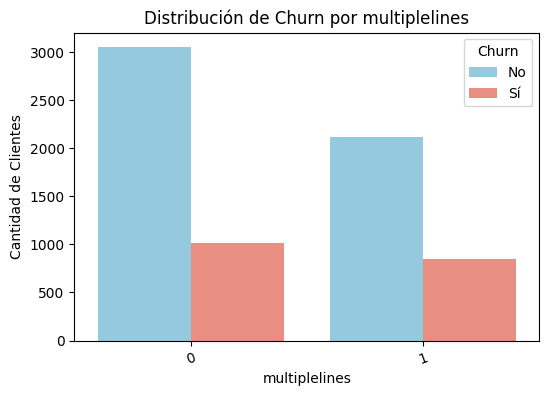

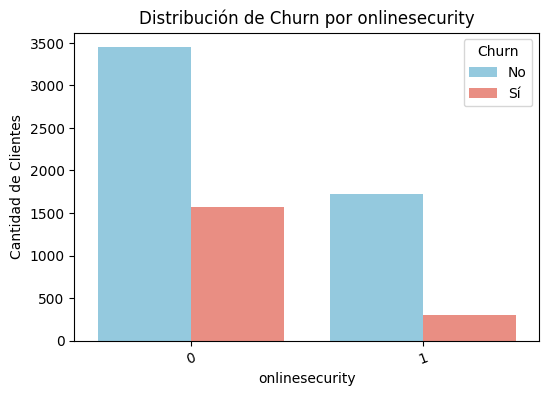

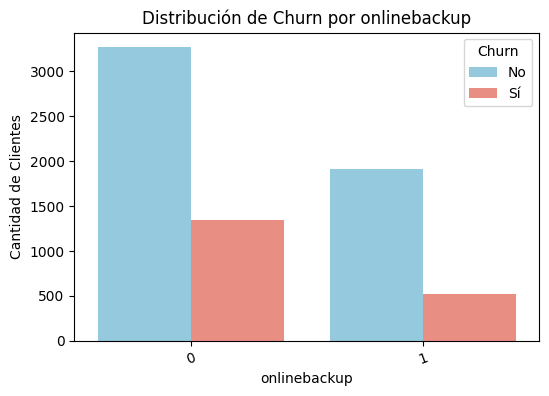

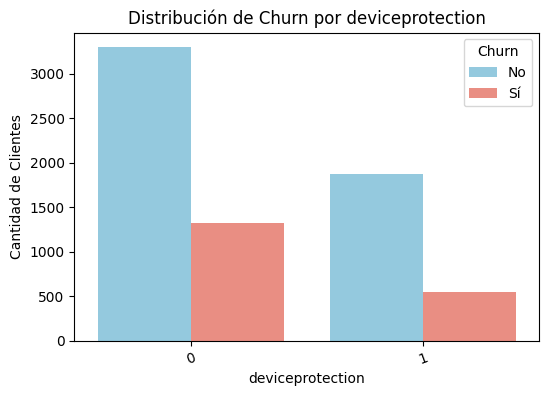

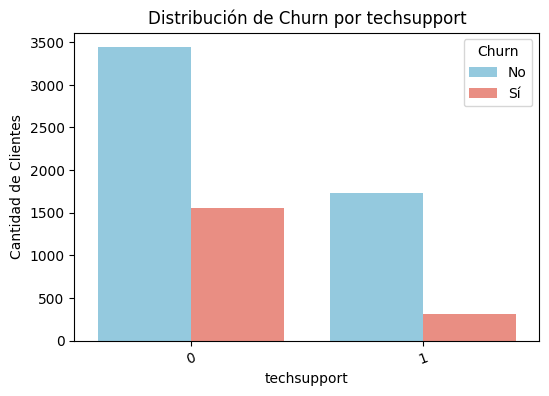

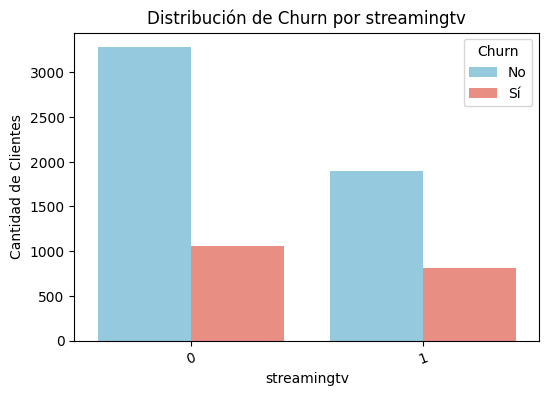

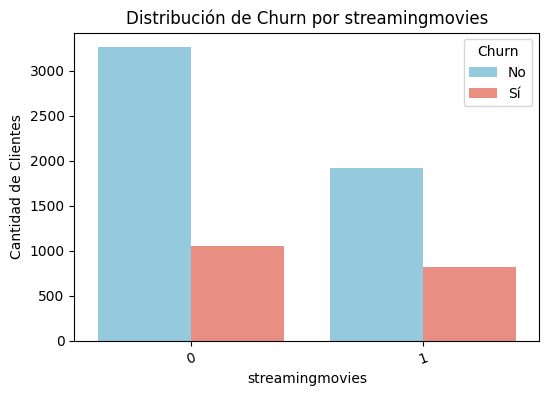

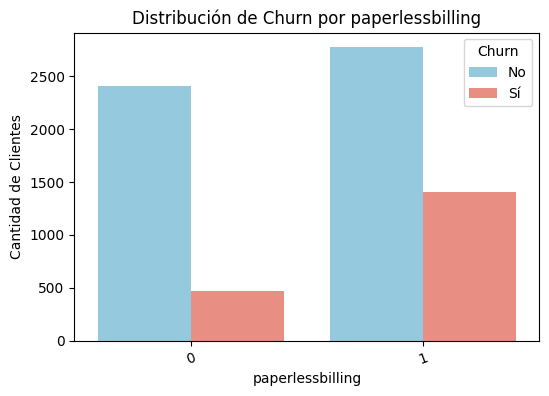

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columnas categóricas originales
categorical_vars = ['genero', 'seniorcitizen', 'partner', 'dependents',
                    'phoneservice', 'multiplelines', 'onlinesecurity',
                    'onlinebackup', 'deviceprotection', 'techsupport',
                    'streamingtv', 'streamingmovies', 'paperlessbilling']

df_plot = df_normalized.copy()
df_plot['churn_label'] = df_plot['churn'].map({0: 'No', 1: 'Sí'})  # solo para gráfico

for var in categorical_vars:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data=df_plot, x=var, hue='churn_label', palette=['skyblue', 'salmon'])
    plt.title(f'Distribución de Churn por {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad de Clientes')
    plt.xticks(rotation=20)
    plt.legend(title='Churn')
    plt.show()


##Conteo de evasión por variables numéricas

/tmp/ipython-input-1328822835.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='churn_label', y=var, palette=['skyblue', 'salmon'])


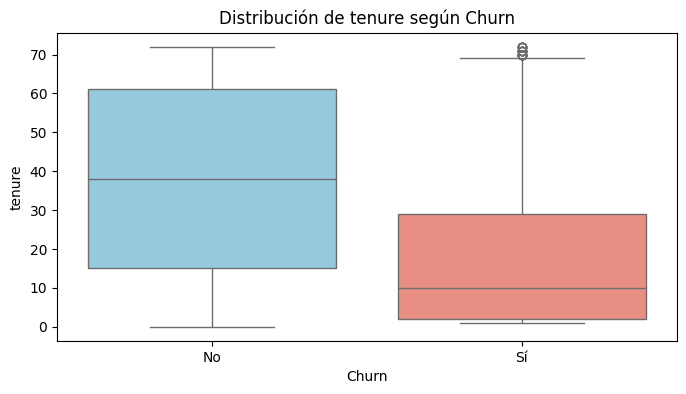

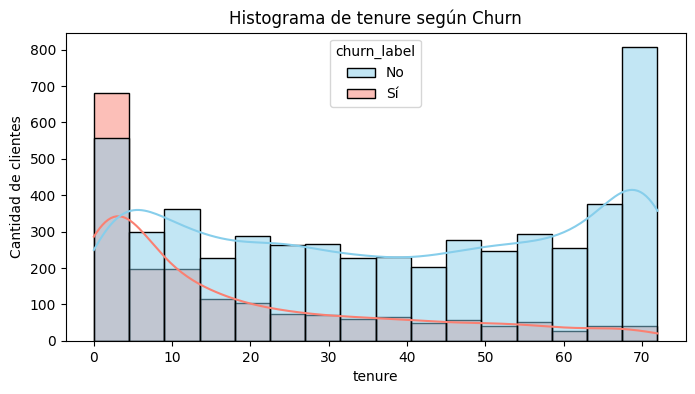

/tmp/ipython-input-1328822835.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='churn_label', y=var, palette=['skyblue', 'salmon'])


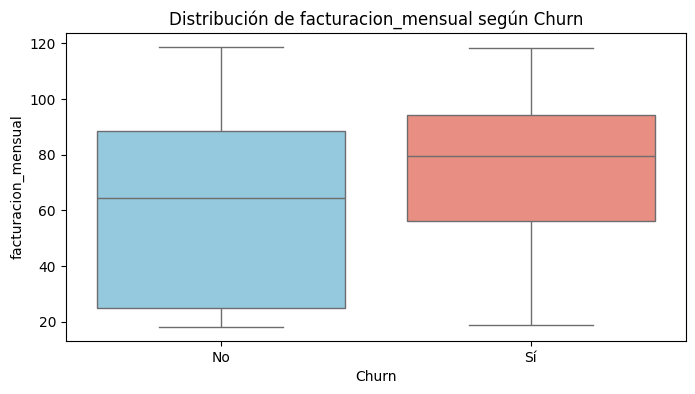

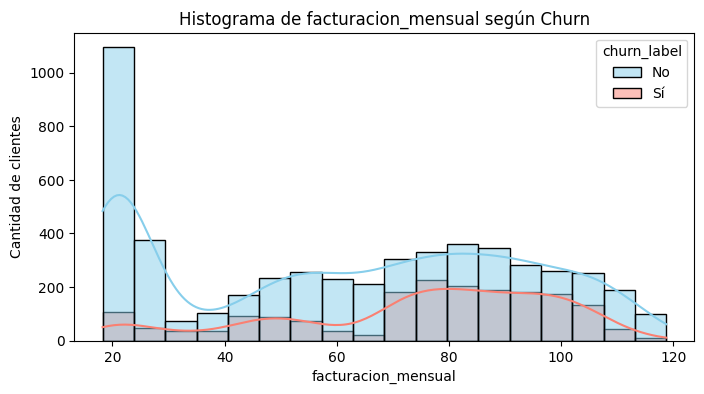

/tmp/ipython-input-1328822835.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='churn_label', y=var, palette=['skyblue', 'salmon'])


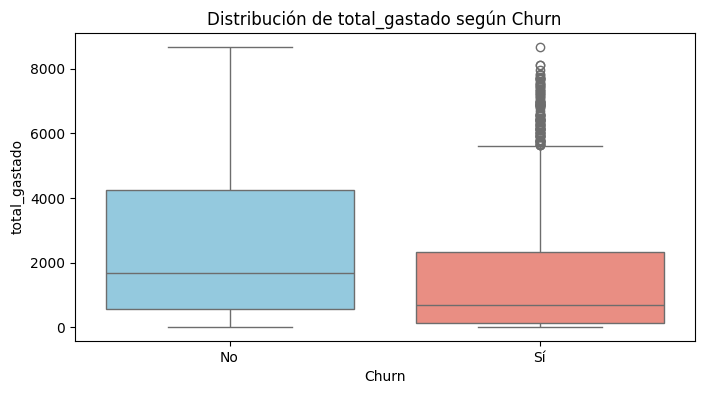

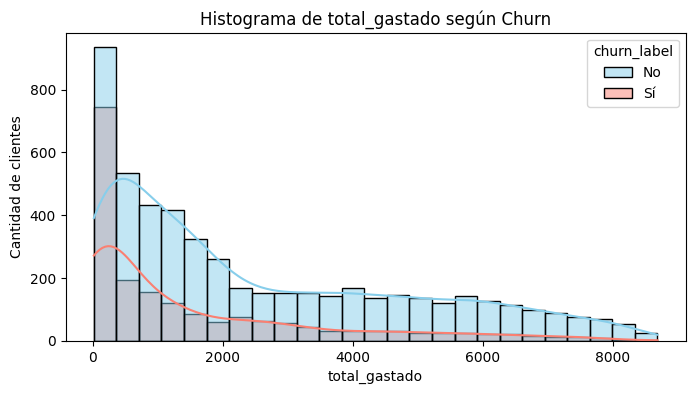

/tmp/ipython-input-1328822835.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='churn_label', y=var, palette=['skyblue', 'salmon'])


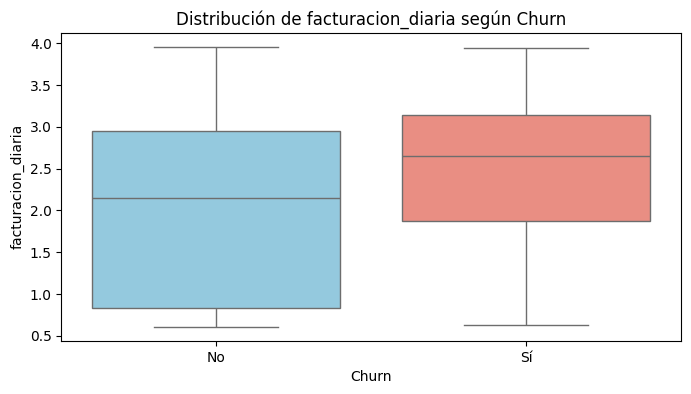

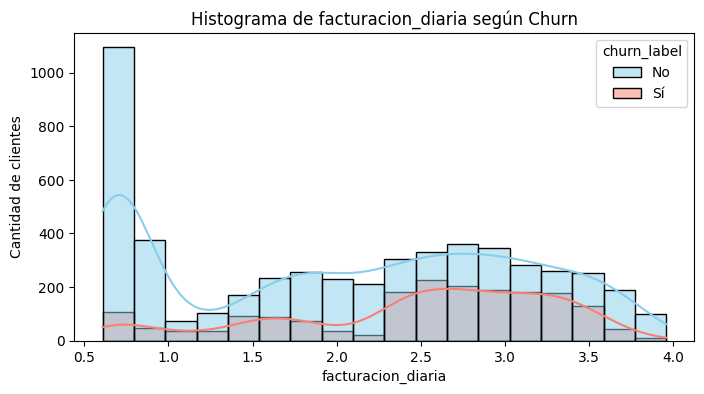

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una copia del dataset y mapear churn a etiquetas para mayor claridad
df_plot = df_normalized.copy()
df_plot['churn_label'] = df_plot['churn'].map({0: 'No', 1: 'Sí'})

# Variables numéricas a analizar
numeric_vars = ['tenure', 'facturacion_mensual', 'total_gastado', 'facturacion_diaria']

for var in numeric_vars:
    plt.figure(figsize=(8,4))

    # Boxplot: útil para ver distribución y outliers
    sns.boxplot(data=df_plot, x='churn_label', y=var, palette=['skyblue', 'salmon'])

    plt.title(f'Distribución de {var} según Churn')
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.show()

    # Histograma superpuesto (opcional)
    plt.figure(figsize=(8,4))
    sns.histplot(data=df_plot, x=var, hue='churn_label', kde=True, palette=['skyblue', 'salmon'], alpha=0.5)
    plt.title(f'Histograma de {var} según Churn')
    plt.xlabel(var)
    plt.ylabel('Cantidad de clientes')
    plt.show()


# 📄Informe Final — Análisis de Evasión de Clientes (Churn)

## Introducción
En este proyecto analizamos el fenómeno de **evasión de clientes (Churn)** con el objetivo de:
- **Comprender** qué factores se asocian a que un cliente abandone el servicio.
- **Cuantificar** patrones y relaciones clave en los datos.
- **Proveer** recomendaciones accionables para **reducir la evasión** y mejorar la **retención**.

> **Definición operativa:** consideramos *Churn* como la variable objetivo binaria que indica si el cliente **abandonó** (1/Sí) o **permaneció** (0/No).

---

## Limpieza y Tratamiento de Datos
**Resumen de pasos realizados:**
1. **Importación de datos:** lectura desde la fuente provista y verificación de tipos.
2. **Calidad de datos:**
   - Revisión de **valores faltantes** y **duplicados**.
   - Conversión de columnas a tipos correctos (numéricas/categóricas/fechas).
   - Tratamiento de outliers en variables numéricas cuando correspondía.
3. **Estandarización y normalización:**
   - Uniformización de etiquetas (por ejemplo, “Yes/No”, “Sí/No”, “Male/Female”).
   - Creación de variables derivadas cuando agregaban información (e.g., *antigüedad en meses*, *ingresos por cliente*).
4. **Preparación para EDA:**
   - Codificación de variables categóricas cuando fue necesario para correlaciones.
   - Asegurar consistencia de la variable objetivo **Churn**.

> **Notas específicas del dataset:**  
- Columnas clave presentes: *tenure*, *MonthlyCharges*, *TotalCharges*, *Contract*, *PaymentMethod*, *InternetService*, entre otras.  
- La variable **Churn** quedó estandarizada a {0: No churn, 1: Churn}.

---

## Análisis Exploratorio de Datos (EDA)
A continuación se presentan análisis y visualizaciones ejecutadas en el notebook:

1. **Balance de clases (Churn vs No Churn):** proporción de clientes que abandonaron vs. los que permanecen.
2. **Distribución de variables numéricas por Churn:**
   - *tenure* (antigüedad): los clientes con menor antigüedad tienden a presentar mayor churn.
   - *MonthlyCharges* y *TotalCharges*: exploración de diferencias de gasto entre grupos.
3. **Correlaciones numéricas:** correlación de características numéricas con la variable objetivo (cuando está codificada).
4. **Variables categóricas clave (barras apiladas/agrupadas):**
   - **Contract** (Month-to-month, One year, Two year).
   - **PaymentMethod** (Electronic check, etc.).
   - **InternetService** (DSL, Fiber optic, None).
   - **TechSupport/OnlineSecurity** (si están presentes).
5. **Interacciones simples:** combinaciones de 2–3 variables relevantes para observar patrones (cuando aplica).

> Las gráficas incluidas respaldan las conclusiones al mostrar **diferencias claras** entre clientes que abandonan vs. permanecen.

---

## Conclusiones e Insights
**Hallazgos principales:**
- **Antigüedad (tenure):** los clientes con menor tenure muestran **mayor probabilidad de churn**.
- **Tipo de contrato:** los contratos **month-to-month** se asocian con **más churn**; contratos anuales/bianuales retienen mejor.
- **Método de pago:** métodos como **Electronic check** suelen correlacionar con mayor churn en datasets tipo Telco.
- **Costo mensual (MonthlyCharges):** cargos mensuales **más altos** pueden asociarse a mayor churn, especialmente si no hay valor percibido (sin servicios de soporte / seguridad).

**Implicancias de negocio:**
- El churn no es aleatorio; existen **segmentos de riesgo** con patrones específicos que permiten **acciones de retención dirigidas**.

---

## Recomendaciones
1. **Ofertas de retención para clientes de alto riesgo:**
   - Bonificaciones o descuentos temporales a clientes con **tenure bajo** y **contrato month-to-month**.
2. **Incentivar contratos más largos:**
   - **Upgrade** con beneficios (precio preferencial, meses bonificados) para migrar a **contratos anuales/bianuales**.
3. **Mejora de valor percibido:**
   - Paquetes que **incluyan** *TechSupport/OnlineSecurity* para clientes con **MonthlyCharges altos**.
4. **Optimización del onboarding:**
   - Acompañamiento proactivo durante los **primeros 90 días** (mayor riesgo de churn temprano).
5. **Alertas tempranas:**
   - Implementar un **score de riesgo** con las variables más predictivas y crear **campañas automatizadas** (email/SMS/call center) para intervenir antes del churn.
6. **Experimentos A/B:**
   - Testear **mensajes**, **descuentos** y **paquetes** distintos por segmento para medir impacto real en retención.

---
